### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import case study functions that can be reused

NOTE: I have created a file called `case_study_functions.py` to house the functions used in this case, because it cleans up the code below and the functions can easily be reused by colleagues. The last two lines in the cell bellow allow the user to save any changes in `case_study_functions.py` without having to restart the kernel.

In [2]:
import case_study_functions as csf
%load_ext autoreload
%autoreload 2

### Import Dataset

Note: The cell below utilizes a feature in pandas called `read_csv` and allow the user to fetch data from a `.csv` file and format it into a DataFrame.
In the case of `Dataset.csv`, it is crucial to add `sep=';'` to seperate the data by semi colon.

In [3]:
data = pd.read_csv(r'C:\Users\braza\Case Study\Dataset.csv', sep=';', index_col='Date')
data.head()

,SP500_LEVEL,SP500_NTM_EPS,SP500_DIV_YIELD,SPTSX_LEVEL,SPTSX_NTM_EPS,SPTSX_DIV_YIELD,MSCI_EAFE_LEVEL,MSCI_EAFE_NTM_EPS,MSCI_EAFE_DIV_YIELD,FTSE_TMX_UNIV_BOND_IDX_LEVEL,...,US_10Y_RATE,US_30Y_RATE,GERMANY_90D_RATE,GERMANY_2Y_RATE,GERMANY_10Y_RATE,GERMANY_30Y_RATE,US_MANUFACTURING_PMI,EZ_MANUFACTURING_PMI,GLOBAL_MANUFACTURING_PMI,EMERGING_MANUFACTURING_PMI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,3500.31,130.64,1.67,16514.44,681.76,3.20,1909.99,89.32,2.77,1209.759,...,0.7048,1.4747,-0.563,-0.652,-0.397,0.062,56.0,51.7,51.8,52.5
2020-07-31,3271.12,128.92,1.79,16169.21,658.41,3.27,1820.21,90.36,2.92,1223.592,...,0.5282,1.1925,-0.559,-0.713,-0.524,-0.101,54.2,51.8,50.6,51.4
2020-06-30,3100.29,124.70,1.90,15515.22,629.57,3.42,1780.58,90.22,2.95,1208.266,...,0.6561,1.4107,-0.544,-0.687,-0.454,0.005,52.6,47.4,47.9,49.6
2020-05-31,3044.31,125.22,1.94,15192.83,607.36,3.51,1725.09,93.79,3.09,1188.173,...,0.6526,1.4064,-0.521,-0.659,-0.447,0.003,43.1,39.4,42.4,45.4
2020-04-30,2912.43,129.27,2.05,14780.74,748.02,3.67,1657.69,99.48,3.39,1184.466,...,0.6393,1.2848,-0.568,-0.760,-0.586,-0.177,41.5,33.4,39.6,42.7


### Reverse rows

NOTE: The cell below reverses the order of the DataFrame to make additional steps easier.

In [4]:
data1 = data.iloc[::-1]
data1.head()

,SP500_LEVEL,SP500_NTM_EPS,SP500_DIV_YIELD,SPTSX_LEVEL,SPTSX_NTM_EPS,SPTSX_DIV_YIELD,MSCI_EAFE_LEVEL,MSCI_EAFE_NTM_EPS,MSCI_EAFE_DIV_YIELD,FTSE_TMX_UNIV_BOND_IDX_LEVEL,...,US_10Y_RATE,US_30Y_RATE,GERMANY_90D_RATE,GERMANY_2Y_RATE,GERMANY_10Y_RATE,GERMANY_30Y_RATE,US_MANUFACTURING_PMI,EZ_MANUFACTURING_PMI,GLOBAL_MANUFACTURING_PMI,EMERGING_MANUFACTURING_PMI
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,1280.09,84.34,1.85,11945.64,759.04,1.91,1782.57,123.33,2.90,605.30,...,4.5152,4.6768,2.516,2.955,3.467,3.728,55.0,53.5,54.4,52.0
2006-02-28,1280.66,84.48,1.87,11688.34,763.13,2.01,1776.42,122.58,2.91,608.58,...,4.5510,4.5075,2.572,3.021,3.489,3.716,55.8,54.5,54.9,53.2
2006-03-31,1294.83,84.54,1.84,12110.61,769.34,2.32,1827.65,122.85,2.80,606.48,...,4.8472,4.8898,2.702,3.290,3.771,3.986,54.3,56.1,54.3,51.9
2006-04-30,1310.61,84.98,1.82,12204.17,763.08,2.25,1910.15,129.71,2.79,600.80,...,5.0505,5.1615,2.688,3.379,3.951,4.186,55.2,56.7,55.1,54.2
2006-05-31,1270.09,85.17,1.91,11744.52,770.70,2.42,1826.73,133.56,3.02,603.03,...,5.1186,5.2277,2.800,3.355,3.982,4.269,53.7,57.0,54.5,53.5


### Separate the data by type

NOTE: The cells below divide the DataFrame into three sections for ease of readability and analysis.

PMI Indices:

In [21]:
pmi = data1.loc[:, 'US_MANUFACTURING_PMI':]
pmi.tail()

,US_MANUFACTURING_PMI,EZ_MANUFACTURING_PMI,GLOBAL_MANUFACTURING_PMI,EMERGING_MANUFACTURING_PMI
Date,,,,
2020-04-30,41.5,33.4,39.6,42.7
2020-05-31,43.1,39.4,42.4,45.4
2020-06-30,52.6,47.4,47.9,49.6
2020-07-31,54.2,51.8,50.6,51.4
2020-08-31,56.0,51.7,51.8,52.5


Interest Rates:

In [22]:
int_rates = data1.loc[:, 'CANADA_90D_RATE':'GERMANY_30Y_RATE']
int_rates = int_rates/100
int_rates.tail()

,CANADA_90D_RATE,CANADA_2Y_RATE,CANADA_10Y_RATE,CANADA_30Y_RATE,US_90D_RATE,US_2Y_RATE,US_10Y_RATE,US_30Y_RATE,GERMANY_90D_RATE,GERMANY_2Y_RATE,GERMANY_10Y_RATE,GERMANY_30Y_RATE
Date,,,,,,,,,,,,
2020-04-30,0.00263,0.00312,0.00547,0.01128,0.000788,0.001956,0.006393,0.012848,-0.00568,-0.00760,-0.00586,-0.00177
2020-05-31,0.00192,0.00290,0.00534,0.01118,0.001246,0.001603,0.006526,0.014064,-0.00521,-0.00659,-0.00447,0.00003
2020-06-30,0.00209,0.00292,0.00528,0.00991,0.001293,0.001485,0.006561,0.014107,-0.00544,-0.00687,-0.00454,0.00005
2020-07-31,0.00170,0.00268,0.00467,0.00927,0.000837,0.001054,0.005282,0.011925,-0.00559,-0.00713,-0.00524,-0.00101
2020-08-31,0.00147,0.00275,0.00622,0.01164,0.000938,0.001309,0.007048,0.014747,-0.00563,-0.00652,-0.00397,0.00062


Price Levels:

In [23]:
levels = data1.loc[:, ['SP500_LEVEL','SPTSX_LEVEL','MSCI_EAFE_LEVEL','FTSE_TMX_UNIV_BOND_IDX_LEVEL','FTSE_TMX_CORP_BOND_IDX_LEVEL']]
levels.tail()

,SP500_LEVEL,SPTSX_LEVEL,MSCI_EAFE_LEVEL,FTSE_TMX_UNIV_BOND_IDX_LEVEL,FTSE_TMX_CORP_BOND_IDX_LEVEL
Date,,,,,
2020-04-30,2912.43,14780.74,1657.69,1184.466,1312.147
2020-05-31,3044.31,15192.83,1725.09,1188.173,1319.989
2020-06-30,3100.29,15515.22,1780.58,1208.266,1353.965
2020-07-31,3271.12,16169.21,1820.21,1223.592,1379.028
2020-08-31,3500.31,16514.44,1909.99,1209.759,1371.988


### Convert levels into monthly returns and drop first date

NOTE: The cell below takes the price levels and converts them into monthly returns by utilizing the `pct_change()` formula and drops the first date since it is 'NaN' using `dropna()`.

In [8]:
rets = levels.pct_change().dropna()
rets.head()

,SP500_LEVEL,SPTSX_LEVEL,MSCI_EAFE_LEVEL,FTSE_TMX_UNIV_BOND_IDX_LEVEL,FTSE_TMX_CORP_BOND_IDX_LEVEL
Date,,,,,
2006-02-28,0.000445,-0.021539,-0.003450,0.005419,0.004150
2006-03-31,0.011065,0.036127,0.028839,-0.003451,-0.001989
2006-04-30,0.012187,0.007725,0.045140,-0.009366,-0.007067
2006-05-31,-0.030917,-0.037663,-0.043672,0.003712,0.003794
2006-06-30,0.000087,-0.011209,-0.002108,-0.004577,-0.004279


### Expected Returns using `annualize_rets()` from case_study_functions

NOTE: To estimate the expected return for each asset, I have chosen to take the annualized return based on the historic price levels that were provided in the case. I feel that it is an appropriate estimation, as 14 years of data (including two major recessions) should provide sufficient variation to help contextualize what an average year moving forward could look like. Although historical returns cannot predict future price movements, I believe it is more than adequate in this case.

Input returns and number of periods per year:

In [9]:
exp_rets = csf.annualize_rets(rets, 12)
exp_rets

SP500_LEVEL                     0.071412
SPTSX_LEVEL                     0.022457
MSCI_EAFE_LEVEL                 0.004746
FTSE_TMX_UNIV_BOND_IDX_LEVEL    0.048628
FTSE_TMX_CORP_BOND_IDX_LEVEL    0.053566
dtype: float64

### Covariance of index returns

NOTE: The cell below calculates the covariance matrix using the `cov()` function.

In [10]:
cov = rets.cov()
cov

,SP500_LEVEL,SPTSX_LEVEL,MSCI_EAFE_LEVEL,FTSE_TMX_UNIV_BOND_IDX_LEVEL,FTSE_TMX_CORP_BOND_IDX_LEVEL
SP500_LEVEL,0.001876,0.001354,0.001894,-0.000005,0.000103
SPTSX_LEVEL,0.001354,0.001507,0.001493,0.000036,0.000147
MSCI_EAFE_LEVEL,0.001894,0.001493,0.002445,0.000005,0.000127
FTSE_TMX_UNIV_BOND_IDX_LEVEL,-0.000005,0.000036,0.000005,0.000117,0.000100
FTSE_TMX_CORP_BOND_IDX_LEVEL,0.000103,0.000147,0.000127,0.000100,0.000114


### Calculate risk-free rate

NOTE: I have chosen to calculate the riskfree rate as an average of Canadian, American, and German 10Y Rates as of 2020-08. The reason I chose to include all three countries is because the market indices include Canadian, American, and Global securities. The reason I chose the most recent 10Y rates is because it is widely expected that long-term interest rates in all three countries will remain subdued for the next 2-3 years.

In [11]:
int_rates_10Y = int_rates.loc['2020-08-31',['CANADA_10Y_RATE', 'US_10Y_RATE', 'GERMANY_10Y_RATE']]
print('The most recent 10Y Rates in Canada, US, and Germany are:')
print(int_rates_10Y)

The most recent 10Y Rates in Canada, US, and Germany are:
CANADA_10Y_RATE     0.006220
US_10Y_RATE         0.007048
GERMANY_10Y_RATE   -0.003970
Name: 2020-08-31, dtype: float64


In [12]:
rf = int_rates_10Y.mean()
print('The mean of the Canadian, American, and German 10Y rates is:')
print(rf)

The mean of the Canadian, American, and German 10Y rates is:
0.0030993333333333324


### Max Sharpe Portfolio Weights

NOTE: In the cell below, the first line calculates the max sharpe ratio weights using the `msr()` function from `case_study_functions.py`. The following lines assign the corresponding tickers to their weights for readability.

Input riskfree rate, expected return, and covariance:

In [13]:
sharpe_weights = csf.msr(rf, exp_rets, cov)

tickers = ['SP500','SPTSX','MSCI_EAFE','FTSE_TMX_UNIV_BOND_IDX','FTSE_TMX_CORP_BOND_IDX']
sharpe_weights_df = pd.DataFrame(sharpe_weights).T
sharpe_weights_df.columns = ['SP500','SPTSX','MSCI_EAFE','FTSE_TMX_UNIV_BOND_IDX','FTSE_TMX_CORP_BOND_IDX']
sharpe_weights_df.index = ['Sharpe Weights']

print('The Weights that Maximize the Expected Sharpe Ratio are:')
sharpe_weights_df

The Weights that Maximize the Expected Sharpe Ratio are:


,SP500,SPTSX,MSCI_EAFE,FTSE_TMX_UNIV_BOND_IDX,FTSE_TMX_CORP_BOND_IDX
Sharpe Weights,0.040047,1.228479e-13,1.316379e-13,0.22659,0.733364


### Max Sharpe Portfolio Return and Volatility

NOTE: In the cell below, the first line calculates the portfolio return using the `portfolio_return()` function from `case_study_functions.py`, given the sharpe_weights and expected returns.

In [24]:
port_ret = csf.portfolio_return(sharpe_weights, exp_rets)

print('The Expected Portfolio Return with Sharpe Weights is:')
print(port_ret)

The Expected Portfolio Return with Sharpe Weights is:
0.05316193653507359


NOTE: In the cell below, the first line calculates the portfolio volatility using the `portfolio_vol()` function from `case_study_functions.py`, given the sharpe_weights and covariance matrix.

In [26]:
port_vol = csf.portfolio_vol(sharpe_weights, cov)

print('The Expected Portfolio Volatility with Sharpe Weights is:')
print(port_vol)

The Expected Portfolio Volatility with Sharpe Weights is:
0.010473479732043685


### Expected Sharpe Ratios for every asset class

NOTE: The cells below calculate sharpe ratios for each asset using the `sharpe_ratio()` function from `case_study_functions.py`, given the returns, riskfree rate, and periods per year:

In [16]:
sr_port = csf.sharpe_ratio(rets, rf, 12)

print('The Sharpe Ratios for each asset are:')
print(sr_port)

The Sharpe Ratios for each asset are:
SP500_LEVEL                     0.453975
SPTSX_LEVEL                     0.143540
MSCI_EAFE_LEVEL                 0.009559
FTSE_TMX_UNIV_BOND_IDX_LEVEL    1.213010
FTSE_TMX_CORP_BOND_IDX_LEVEL    1.359631
dtype: float64


### Optimal Weights and Global Minimum Variance Portfolio

NOTE: The following code generates a list of weights to run the optimizer on to minimize the volatility using the `optimal_weights()` function from `case_study_functions.py`, given n_points, expected return, and covariance.

In [18]:
opt_weights = csf.optimal_weights(10, exp_rets, cov)
print('Here is a list of 10 optimal weights:')
print(opt_weights)

Here is a list of 10 optimal weights:
[array([0.00000000e+00, 2.71050543e-18, 1.00000000e+00, 4.94667241e-18,
       1.98883336e-18]), array([0.00000000e+00, 1.11022302e-16, 8.31198503e-01, 1.68801497e-01,
       3.26980644e-18]), array([0.00000000e+00, 0.00000000e+00, 6.62397005e-01, 3.37602995e-01,
       3.53996245e-17]), array([0.00000000e+00, 6.93889390e-17, 4.93595508e-01, 5.06404492e-01,
       0.00000000e+00]), array([0.00000000e+00, 6.41295039e-17, 3.24794011e-01, 6.75205989e-01,
       3.05311332e-16]), array([0.00000000e+00, 6.61258882e-03, 1.52048792e-01, 8.41338619e-01,
       2.49800181e-16]), array([0.00000000e+00, 2.77555756e-17, 3.83707085e-02, 5.06859126e-01,
       4.54770166e-01]), array([1.69843240e-01, 0.00000000e+00, 5.31055777e-17, 3.98986399e-16,
       8.30156760e-01]), array([5.84921619e-01, 1.23599048e-17, 8.94466792e-18, 1.38777878e-16,
       4.15078381e-01]), array([1.00000000e+00, 0.00000000e+00, 4.10184175e-17, 0.00000000e+00,
       9.87477418e-12])]


NOTE: The following code calculates the global minimum variance portfolio (the portfolio with the lowest variance) using the `gmv()` function from `case_study_functions.py`, given the covariance matrix.

In [19]:
csf.gmv(cov)

array([3.64930152e-02, 5.77934309e-13, 1.13090127e-13, 5.71736525e-01,
       3.91770460e-01])

### Efficient Frontier

NOTE: The cell below calculates the portfolio volatility using the plot_ef() function from case_study_functions.py.
Setting `show_cml=True` toggles the capital market line and tangency/sharpe portfolio (in green). Setting `show_ew=True` toggles the equally weighted portfolio (in orange). Setting `show_gmv=True` toggles the global minimum variance portfolio (in purple). 

<AxesSubplot:xlabel='Volatility'>

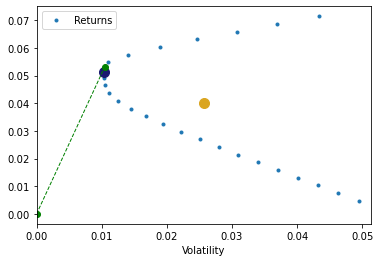

In [20]:
csf.plot_ef(25, exp_rets, cov, show_cml=True, show_ew=True, show_gmv=True)

Thank you very much.